# Task 1: Data preparation and customer analytics
### Examine transaction data
- Inconsistencies
- Missing Data
- Outliers
- Correctly identified category items
- Numeric data

### Examine customer data
- Above anomalies
- Null values

### Data Analysis and Customer Segments
- Total sales
- Drivers of sales
- Where the highest sales are coming from
- Charts, graphs, trends and insights

### Deep dive into customer segments
- Recommendation
- Target segment

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import xlrd
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Loading the datasets
transactions_data = pd.read_excel('/content/drive/MyDrive/Quantium Data Analytics /QVI_transaction_data.xlsx')
customers_data = pd.read_csv('/content/drive/MyDrive/Quantium Data Analytics /QVI_purchase_behaviour.csv')

# Exploratory Data Analysis

In [ ]:
transactions_df = transactions_data.copy()
transactions_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


We can see that the 'Date' data is in integer format.

**Change to DD/MM/YYYY format**

In [ ]:
transactions_df['DATE'] = pd.to_datetime(transactions_df['DATE'], unit='D', origin='1899-12-30')
print(transactions_df['DATE'].dtype)

datetime64[ns]


To ensure we are only examining chip purchases

In [ ]:
transactions_df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

While it looks like we have chips, we want to check that the products are only chips by counting the word frequencies in the product names. To make this process clearer, we can remove the digits and symbols from the names.

In [ ]:
# Remove the digits from the product names
prod_name = transactions_df['PROD_NAME'].str.replace(r'[0-9]+[gG]','');

# Remove & characters from the product names and replace with a space to separate flavours
prod_name = prod_name.str.replace(r'&',' ');

In [ ]:
# Count the frequencies of words in product names and display counts in descending order
word_counts = pd.Series(' '.join(prod_name).split()).value_counts()

# Remove values from word_counts having quantity - 175g, 150g, etc.
word_counts = word_counts[~word_counts.index.str.contains(r'^\d+[gG]$')]

with pd.option_context('display.max_rows', None): # show all rows
  display(word_counts)

,count
Chips,49770
Kettle,41288
Smiths,28860
Salt,27976
Cheese,27890
Pringles,25102
Doritos,24962
Crinkle,23960
Corn,22063
Original,21560


Some entries in our data are salsas. All such data needs to be removed.

In [ ]:
# Remove salsas from the dataset
transactions_df = transactions_df[transactions_df['PROD_NAME'].str.contains(r'[Ss]alsa') == False]
transactions_df.shape

(246742, 8)

In [ ]:
# Create summaries of the transaction data
transactions_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [ ]:
# Check if there are any null values in the dataset
transactions_df.isnull().values.any()

False

From the summary, it is evident that there is at least one transaction with 20 packets.

In [ ]:
# Filter the entries which have 200 packets
transactions_df.loc[transactions_df['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


As these transactions are made by the same customer, the purchases could be for commercial purposes. Check all purchases done by this customer.

In [ ]:
# Filter the entries by the customer
transactions_df.loc[transactions_df['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are only two transactions done by this customer. Remove these entries from the dataset.

In [ ]:
# Remove the transactions
transactions_df = transactions_df[transactions_df['LYLTY_CARD_NBR']!=226000]
transactions_df.shape

(246740, 8)

Check the transaction data summary again.

In [ ]:
transactions_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


In [ ]:
transactions_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
# Count transactions by date to see if there are any missing days
count = transactions_df.groupby(transactions_df['DATE'].dt.date).size().reset_index(name = 'COUNT')
count.shape

(364, 2)

In [ ]:
# Check the range of dates by sorting in time order.
transactions_df.sort_values(by='DATE')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
9161,2018-07-01,88,88140,86914,25,Pringles SourCream Onion 134g,2,7.4
155442,2018-07-01,60,60276,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2
181349,2018-07-01,199,199014,197623,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6
229948,2018-07-01,35,35052,31630,11,RRD Pc Sea Salt 165g,1,3.0
104647,2018-07-01,72,72104,71038,20,Doritos Cheese Supreme 330g,2,11.4
...,...,...,...,...,...,...,...,...
10254,2019-06-30,112,112141,114611,98,NCC Sour Cream & Garden Chives 175g,2,6.0
113220,2019-06-30,207,207155,205513,99,Pringles Sthrn FriedChicken 134g,2,7.4
229182,2019-06-30,10,10140,9882,12,Natural Chip Co Tmato Hrb&Spce 175g,2,6.0
229015,2019-06-30,6,6258,6047,29,French Fries Potato Chips 175g,1,3.0


The dates range from 1 July, 2018 to 30 June, 2019. The number of days in count is 364. So one day is missing. Now check through the year of dates to see which day is missing in the date column.

In [ ]:
# Generate a list of dates with transactions in ascending order
date_counts = transactions_df.groupby('DATE').size()

# Compare to a full list of dates within the same range to find differences between them
pd.date_range(start = '2018-07-01', end = '2019-06-30' ).difference(date_counts.index)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')

The missing day is Christmas day. As it is a public holiday, no sales were done on this day.

Next, create a feature of pack size and check for any outliers.

In [ ]:
# Add a new column for pack size and extract sizes from the product names
transactions_df.insert(8, "PACK_SIZE", transactions_df['PROD_NAME'].str.extract(r'(\d+)').astype(float), True)

# Sort by pack size to check for any outliers
transactions_df.sort_values(by='PACK_SIZE')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
40783,2018-09-25,97,97067,96696,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
42461,2019-05-05,110,110030,111890,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
176183,2018-12-30,82,82183,81660,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
227309,2018-12-03,236,236091,239098,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
42418,2018-11-05,109,109217,111470,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
...,...,...,...,...,...,...,...,...,...
192034,2019-03-12,100,100121,99145,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0
255797,2019-01-19,235,235098,238018,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0
233814,2019-01-24,151,151102,149810,4,Dorito Corn Chp Supreme 380g,1,6.5,380.0
131573,2018-07-09,213,213087,212416,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0


Text(0, 0.5, 'Quantity')

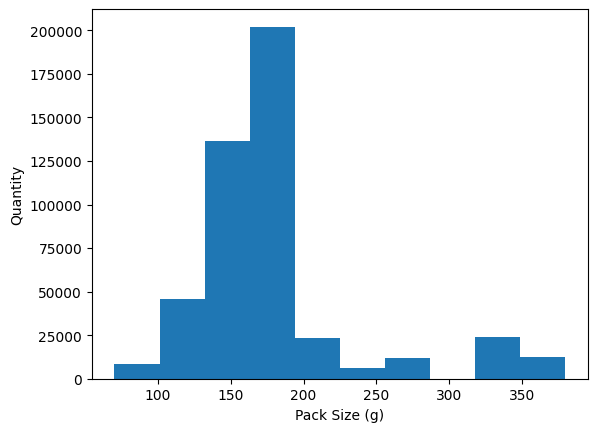

In [ ]:
# Plot a histogram to visualize the distribution of pack sizes.
plt.hist(transactions_df['PACK_SIZE'], weights=transactions_df['PROD_QTY'])
plt.xlabel('Pack Size (g)')
plt.ylabel('Quantity')

Pack sizes look reasonable.

Next, create a column for Brand names, by extracting the first word of the Product Names

In [ ]:
# Add a column to extract the first word of each product name
transactions_df.insert(9, "BRAND_NAME", transactions_df['PROD_NAME'].str.split().str.get(0), True)
transactions_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos


In [ ]:
# Then print all the unique brands in the dataset
transactions_df['BRAND_NAME'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

Some brand names have duplicates. Merging duplicate brand names.

In [ ]:
# Create a function to identify the duplicate brand names
def replace_brand_names(line):
  name = line['BRAND_NAME']
  if name == 'Dorito':
    return 'Doritos'
  elif name == 'Smith':
    return 'Smiths'
  elif name == 'WW':
    return 'Woolworths'
  elif name == 'Infzns':
    return 'Infuzions'
  elif name == 'NCC' or name == 'Natural':
    return 'Natural Chip Co'
  elif name == 'Snbts':
    return 'Sunbites'
  elif name == 'Red' or name == 'RRD':
    return 'Red Rock Deli'
  elif name == 'Grain' or name == 'GrnWves':
    return 'Grain Waves'
  else:
    return name

# Clean brand names using function
transactions_df['BRAND_NAME'] = transactions_df.apply(lambda line: replace_brand_names(line), axis=1)

# Check for duplicate brand names
transactions_df['BRAND_NAME'].unique()

array(['Natural Chip Co', 'CCs', 'Smiths', 'Kettle', 'Grain Waves',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

Check customer data and generate its summaries.

In [ ]:
# Review customer data
customer_df = customers_data.copy()
customer_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
# Rename 'PREMIUM_CUSTOMER' to 'MEMBER_TYPE' for easier identification of column
customer_df = customer_df.rename(columns={'PREMIUM_CUSTOMER':'MEMBER_TYPE'})

In [ ]:
# Summary of customer data
customer_df.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [ ]:
# Check the entries in the member type and lifestage columns
customer_df['MEMBER_TYPE'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [ ]:
customer_df['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

The customer dataset looks fine and can be joined with the transaction dataset.

In [ ]:
# Join the customer and transaction datasets and sort transactions by date
full_df = transactions_df.set_index('LYLTY_CARD_NBR').join(customer_df.set_index('LYLTY_CARD_NBR'))
full_df = full_df.reset_index()
full_df = full_df.sort_values(by='DATE').reset_index(drop=True)
full_df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,MEMBER_TYPE
0,88140,2018-07-01,88,86914,25,Pringles SourCream Onion 134g,2,7.4,134.0,Pringles,MIDAGE SINGLES/COUPLES,Mainstream
1,60276,2018-07-01,60,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2,150.0,Kettle,RETIREES,Mainstream
2,199014,2018-07-01,199,197623,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,110.0,Infuzions,RETIREES,Premium
3,35052,2018-07-01,35,31630,11,RRD Pc Sea Salt 165g,1,3.0,165.0,Red Rock Deli,YOUNG SINGLES/COUPLES,Budget
4,72104,2018-07-01,72,71038,20,Doritos Cheese Supreme 330g,2,11.4,330.0,Doritos,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,112141,2019-06-30,112,114611,98,NCC Sour Cream & Garden Chives 175g,2,6.0,175.0,Natural Chip Co,MIDAGE SINGLES/COUPLES,Mainstream
246736,207155,2019-06-30,207,205513,99,Pringles Sthrn FriedChicken 134g,2,7.4,134.0,Pringles,OLDER SINGLES/COUPLES,Mainstream
246737,10140,2019-06-30,10,9882,12,Natural Chip Co Tmato Hrb&Spce 175g,2,6.0,175.0,Natural Chip Co,YOUNG SINGLES/COUPLES,Budget
246738,6258,2019-06-30,6,6047,29,French Fries Potato Chips 175g,1,3.0,175.0,French,YOUNG SINGLES/COUPLES,Budget


In [ ]:
# Check for nulls in the full dataset
full_df.isnull().values.any()

False

In [ ]:
# Export full data to CSV
full_df.to_csv('/content/drive/MyDrive/Quantium Data Analytics /QVI_fulldata.csv')

# Data Analysis on Customer Segments

Look for interesting insights in the chip market to help recommend a business stretegy.

Metrics to be considered:
- Split of total sales by lifestage and member type
- Number of customers in each segment
- Quantity of chips bought per customer by segment
- Average chip price by customer segment



In [ ]:
# Calculate total sales by lifestage and member type
total_sales_customer = full_df.groupby(['LIFESTAGE', 'MEMBER_TYPE'], as_index=False)['TOT_SALES'].agg(['sum'])
total_sales_customer = total_sales_customer.rename(columns={'sum': 'SUM_TOTAL_SALES'})
total_sales_customer.sort_values(by='SUM_TOTAL_SALES', ascending=False)

,LIFESTAGE,MEMBER_TYPE,SUM_TOTAL_SALES
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60
10,OLDER SINGLES/COUPLES,Mainstream,124648.50
11,OLDER SINGLES/COUPLES,Premium,123537.55
12,RETIREES,Budget,105916.30
7,OLDER FAMILIES,Mainstream,96413.55
14,RETIREES,Premium,91296.65


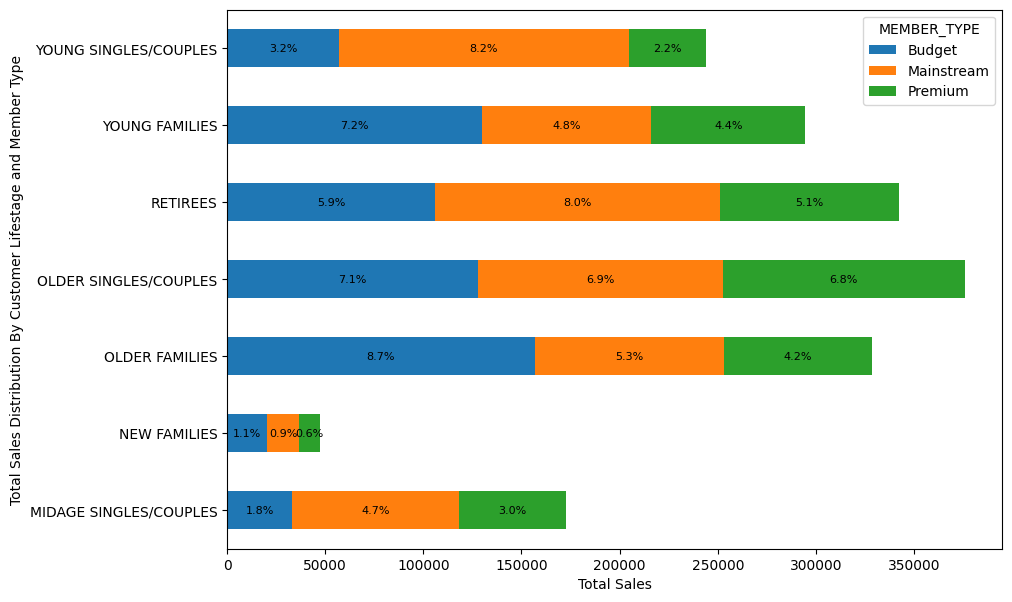

In [ ]:
# Get the total sales
total_sales = full_df['TOT_SALES'].agg(['sum'])['sum']

# Plot a breakdown of the total sales by lifestage and member type
# Change: as_index=True to include 'LIFESTAGE' and 'MEMBER_TYPE' in the index
total_sales_breakdown = full_df.groupby(['LIFESTAGE','MEMBER_TYPE'], as_index = True)['TOT_SALES'].agg(['sum', 'mean']).unstack('MEMBER_TYPE').fillna(0)
ax = total_sales_breakdown['sum'].plot(kind='barh', stacked=True, figsize=(10, 7))

# Add percentages of the summed total sales as labels to each bar
for rect in ax.patches:
  height = rect.get_height()
  width = rect.get_width()
  label = width / total_sales * 100
  x = rect.get_x()
  y = rect.get_y()

  label_text = f'{(label):.1f}%'

  # Set label positions
  label_x = x + width / 2
  label_y = y + height / 2

  # Only plot labels greater than given width
  if width > 0:
    ax.text(label_x, label_y, label_text, ha='center', va = 'center', fontsize = 8)

ax.set_xlabel("Total Sales")
ax.set_ylabel("Total Sales Distribution By Customer Lifestage and Member Type")
plt.show()

We can see that the most sales are from Older Families (Budget), Young Singles/Couples (Mainstream), and Retirees (Mainstream).

In [ ]:
# Check if all rows are unique in customer information
len(customer_df['LYLTY_CARD_NBR'].unique()) == customer_df.shape[0]

True

In [ ]:
# Check if all customers made chip purchases
len(customer_df['LYLTY_CARD_NBR'].unique()) == len(full_df['LYLTY_CARD_NBR'].unique())

False

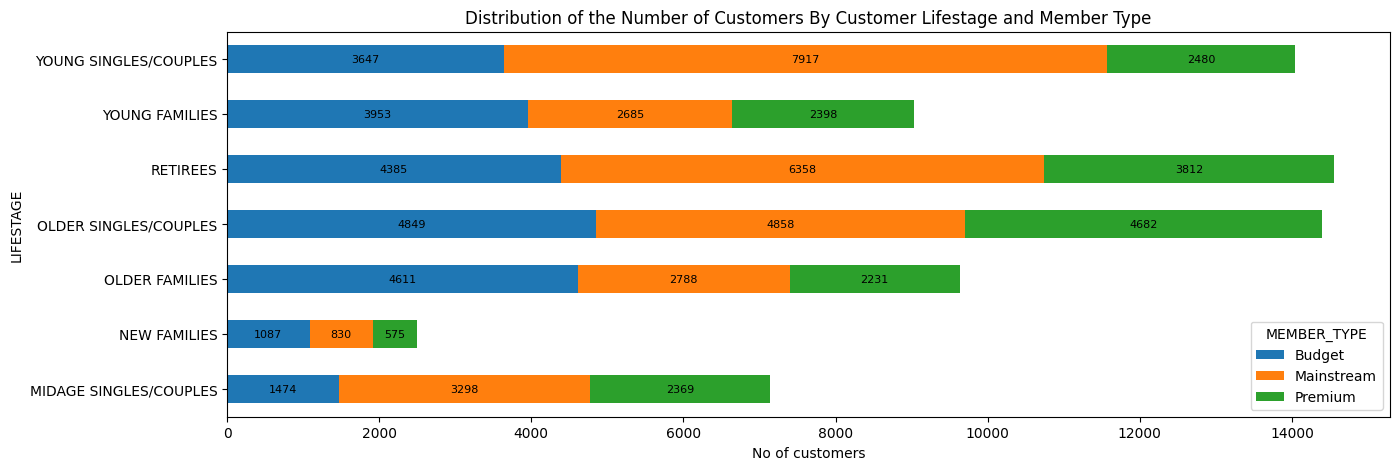

In [ ]:
# Plot the numbers of customers in each segment by counting the unique LYLTY_CARD_NBR entries
sum_customers= full_df.groupby(['LIFESTAGE','MEMBER_TYPE'])['LYLTY_CARD_NBR'].agg('nunique').unstack('MEMBER_TYPE').fillna(0)
ax = sum_customers.plot(kind='barh', stacked=True, figsize=(15, 5))

# Add customer numbers as labels to each bar
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    label_text = f'{(width):.0f}'

    # Set label positions
    label_x = x + width / 2
    label_y = y + height / 2

    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

ax.set_xlabel("No of customers")
ax.set_title('Distribution of the Number of Customers By Customer Lifestage and Member Type')
plt.show()

There are more Young singles/couples (mainstream) and Retirees (mainstream) who buy chips. This contributes to there being more sales to these customer segments but not for the Older families (budget) segment.

Let's take a look at the total and average units of chips bought per customer by Lifestage and Member Type.

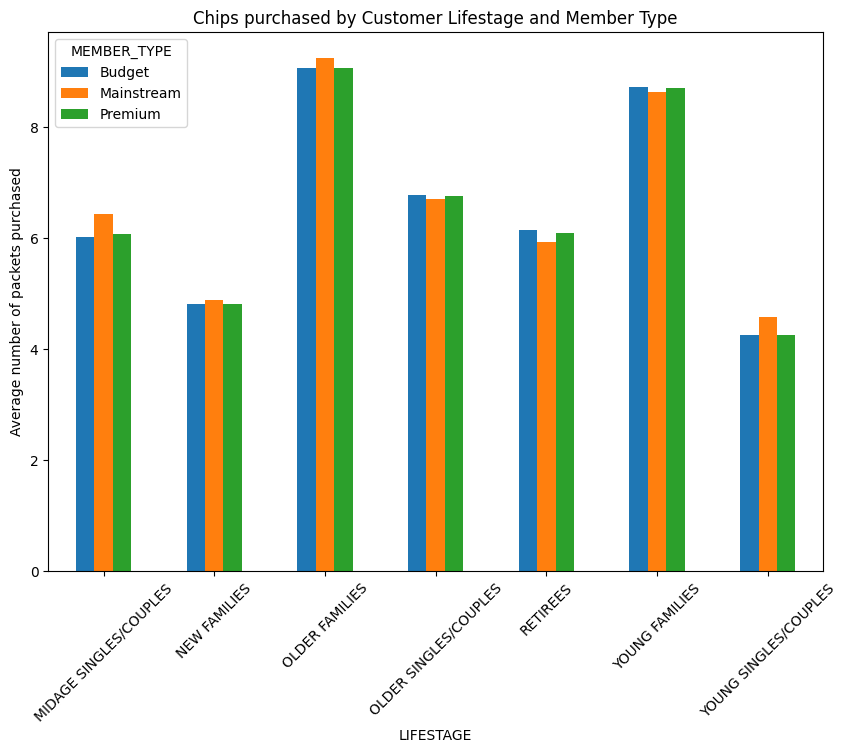

In [ ]:
# Plot the total and average units of chips bought per customer by Lifestage and Member Type
num_packets_data = full_df.groupby(['LIFESTAGE', 'MEMBER_TYPE'])['PROD_QTY'].sum()/full_df.groupby(['LIFESTAGE', 'MEMBER_TYPE'])['LYLTY_CARD_NBR'].nunique(0)
ax = num_packets_data.unstack('MEMBER_TYPE').fillna(0).plot.bar(stacked = False, figsize = (10, 7))
ax.set_ylabel('Average number of packets purchased')
ax.set_title('Chips purchased by Customer Lifestage and Member Type')
plt.xticks(rotation = 45)
plt.show()

Older Families and Young Families buy more chips per customer.

Let's check the average price per unit sold by Lifestage and Member Type.

In [ ]:
# Create a column for unit price of chips purchased per transaction
full_df['UNIT_PRICE'] = full_df['TOT_SALES']/full_df['PROD_QTY']

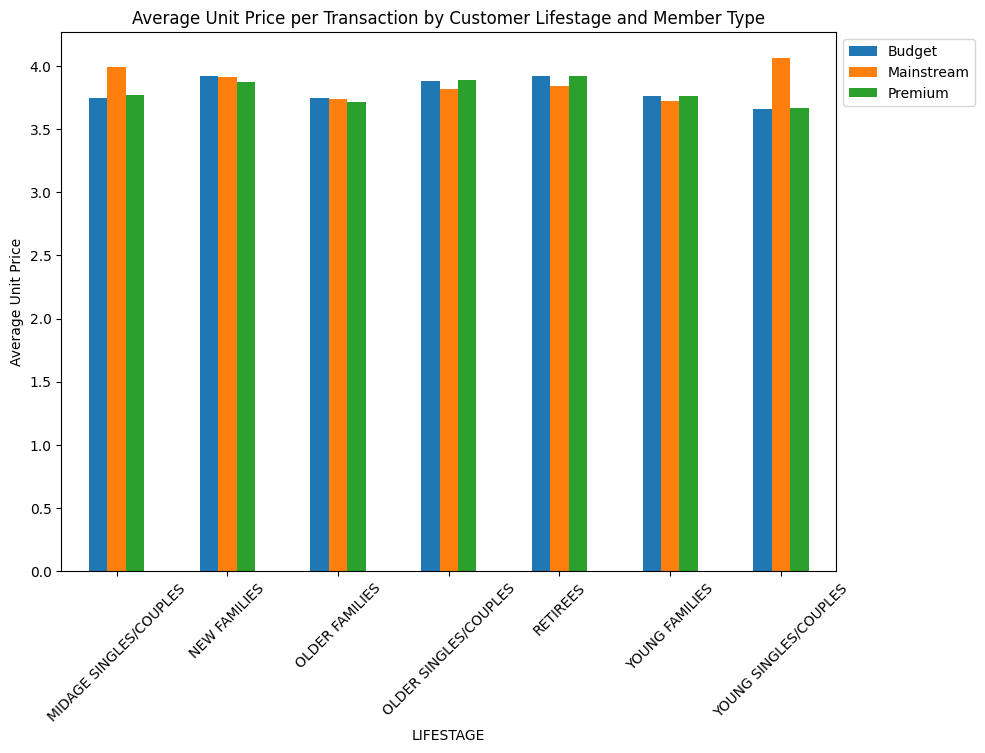

In [ ]:
# Plot the distribution of average unit price per transaction by lifestage and member type
avg_unit_price = full_df.groupby(['LIFESTAGE', 'MEMBER_TYPE'], as_index = True)['UNIT_PRICE'].agg(['mean']).unstack('MEMBER_TYPE').fillna(0)
ax = avg_unit_price['mean'].plot.bar(stacked = False, figsize = (10, 7))
ax.set_ylabel('Average Unit Price')
ax.set_title('Average Unit Price per Transaction by Customer Lifestage and Member Type')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation = 45)
plt.show()

For young and midage singles/couples, the mainstream group are more willing to pay more for a packet of chips than their budget and premium counterpart.

In [ ]:
# Check the difference in the average price unit between mainstream and premium/budget groups for young and midage singles/couples.
from scipy.stats import ttest_ind

mainstream = full_df['MEMBER_TYPE'] == 'Mainstream'
young_midage = (full_df["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (full_df["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")
premium_budget = full_df["MEMBER_TYPE"] != "Mainstream"

group1 = full_df[mainstream & young_midage]["UNIT_PRICE"]
group2 = full_df[premium_budget & young_midage]["UNIT_PRICE"]

# Generate the t-test
stat, pval = ttest_ind(group1.values, group2.values, equal_var=False)

print(pval, stat)

6.967354233018139e-306 37.6243885962295


The results indicate that the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.

# Deep dive into specific customer segments for insights

We might want to target customer segments that contribute the most to sales to retain them or further increase sales. Let's look at Mainstream - young singles/couples.

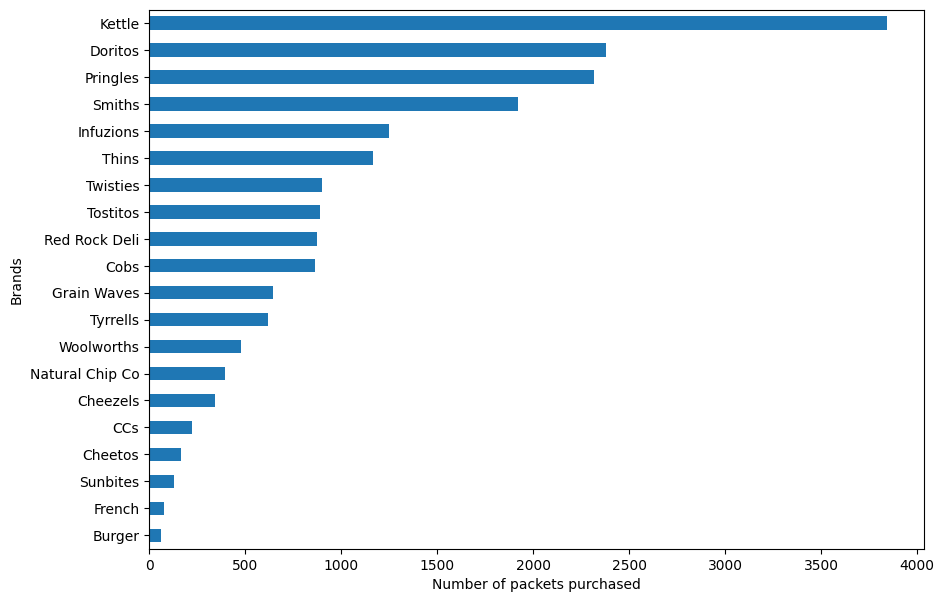

In [ ]:
# Create a visual of what brands young singles/couples are purchasing the most for a general indication
young_mainstream = full_df.loc[full_df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES"]
young_mainstream = young_mainstream.loc[young_mainstream['MEMBER_TYPE'] == "Mainstream"]
ax = young_mainstream["BRAND_NAME"].value_counts().sort_values(ascending = True).plot.barh(figsize=(10, 7))
ax.set_xlabel("Number of packets purchased")
ax.set_ylabel("Brands")
plt.show()

In [ ]:
temp = full_df.copy()
temp["GROUP"] = temp['LIFESTAGE'] + ' - ' + temp['MEMBER_TYPE']

In [ ]:
groups = pd.get_dummies(temp['GROUP'])
brands = pd.get_dummies(temp['BRAND_NAME'])
groups_brands = groups.join(brands)
groups_brands

,MIDAGE SINGLES/COUPLES - Budget,MIDAGE SINGLES/COUPLES - Mainstream,MIDAGE SINGLES/COUPLES - Premium,NEW FAMILIES - Budget,NEW FAMILIES - Mainstream,NEW FAMILIES - Premium,OLDER FAMILIES - Budget,OLDER FAMILIES - Mainstream,OLDER FAMILIES - Premium,OLDER SINGLES/COUPLES - Budget,...,Natural Chip Co,Pringles,Red Rock Deli,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
0,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
246736,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
246737,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
246738,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
freq_groups_brands = apriori(groups_brands, min_support=0.008, use_colnames=True)
rules = association_rules(freq_groups_brands, metric = 'lift', min_threshold=0.5, num_itemsets=freq_groups_brands['itemsets'].apply(len).max())
rules.sort_values('confidence', ascending=False, inplace=True)

In [ ]:
set_temp = temp["GROUP"].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
41,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.079209,0.167334,0.015579,0.196684,1.175400,1.0,0.002325,1.036537,0.162062,0.067453,0.035249,0.144893
0,(MIDAGE SINGLES/COUPLES - Mainstream),(Kettle),0.044966,0.167334,0.008657,0.192519,1.150508,1.0,0.001132,1.031190,0.136978,0.042510,0.030246,0.122127
22,(RETIREES - Budget),(Kettle),0.057652,0.167334,0.010505,0.182214,1.088926,1.0,0.000858,1.018196,0.086660,0.048979,0.017871,0.122496
33,(RETIREES - Premium),(Kettle),0.049591,0.167334,0.008981,0.181105,1.082296,1.0,0.000683,1.016816,0.080006,0.043190,0.016538,0.117388
13,(OLDER SINGLES/COUPLES - Budget),(Kettle),0.069596,0.167334,0.012422,0.178488,1.066658,1.0,0.000776,1.013578,0.067167,0.055330,0.013396,0.126361
21,(OLDER SINGLES/COUPLES - Premium),(Kettle),0.067115,0.167334,0.011944,0.177959,1.063495,1.0,0.000713,1.012925,0.064000,0.053678,0.012760,0.124668
27,(RETIREES - Mainstream),(Kettle),0.080935,0.167334,0.013723,0.169554,1.013269,1.0,0.000180,1.002674,0.014248,0.058508,0.002666,0.125782
17,(OLDER SINGLES/COUPLES - Mainstream),(Kettle),0.069146,0.167334,0.011490,0.166168,0.993034,1.0,-0.000081,0.998602,-0.007479,0.051068,-0.001400,0.117416
35,(YOUNG FAMILIES - Budget),(Kettle),0.071991,0.167334,0.011117,0.154422,0.922837,1.0,-0.000930,0.984730,-0.082654,0.048714,-0.015507,0.110429
5,(OLDER FAMILIES - Budget),(Kettle),0.087193,0.167334,0.013455,0.154318,0.922216,1.0,-0.001135,0.984609,-0.084586,0.055815,-0.015632,0.117364


In [ ]:
rules[rules['antecedents'] == {'YOUNG SINGLES/COUPLES - Mainstream'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
41,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.079209,0.167334,0.015579,0.196684,1.175400,1.0,0.002325,1.036537,0.162062,0.067453,0.035249,0.144893
39,(YOUNG SINGLES/COUPLES - Mainstream),(Doritos),0.079209,0.102229,0.009642,0.121725,1.190712,1.0,0.001544,1.022198,0.173944,0.056123,0.021716,0.108020
42,(YOUNG SINGLES/COUPLES - Mainstream),(Pringles),0.079209,0.101735,0.009382,0.118451,1.164310,1.0,0.001324,1.018962,0.153262,0.054688,0.018609,0.105337


From this apriori analysis, Kettle is the brand of choice for Mainstream - young singles/couples. This is also true for most other segments.

Use the affinity index to see if there are brands this segment prefers more than the other segments to target.

In [ ]:
# Find target rating proportion
target_segment = young_mainstream["BRAND_NAME"].value_counts().sort_values(ascending = True).rename_axis('BRANDS').reset_index(name='target')
target_segment.target /= young_mainstream["PROD_QTY"].sum()

# Find other rating proportion
not_young_mainstream = full_df.loc[full_df['LIFESTAGE'] != "YOUNG SINGLES/COUPLES"]
not_young_mainstream = not_young_mainstream.loc[not_young_mainstream['MEMBER_TYPE'] != "Mainstream"]
other = not_young_mainstream["BRAND_NAME"].value_counts().sort_values(ascending = True).rename_axis('BRANDS').reset_index(name='other')
other.other /= not_young_mainstream["PROD_QTY"].sum()

brand_proportions = target_segment.set_index('BRANDS').join(other.set_index('BRANDS'))

brand_proportions = brand_proportions.reset_index()
brand_proportions['affinity'] = brand_proportions['target']/brand_proportions['other']
brand_proportions.sort_values(by = 'affinity', ascending = False)

,BRANDS,target,other,affinity
8,Tyrrells,0.017088,0.013368,1.278270
13,Twisties,0.024845,0.019632,1.265496
18,Doritos,0.065673,0.052511,1.250646
12,Tostitos,0.024569,0.019944,1.231911
19,Kettle,0.106115,0.086574,1.225712
17,Pringles,0.063906,0.052477,1.217793
10,Cobs,0.023851,0.020004,1.192293
15,Infuzions,0.034507,0.029930,1.152890
9,Grain Waves,0.017833,0.016214,1.099878
14,Thins,0.032188,0.029771,1.081172


By using the affinity index, we can see that mainstream young singles/couples are 28% more likely to purcahse Tyrrells chips than the other segments. However, they are 50% less likely to purchase Burger Rings.

Check if the target segment tends to buy larger packs of chips.

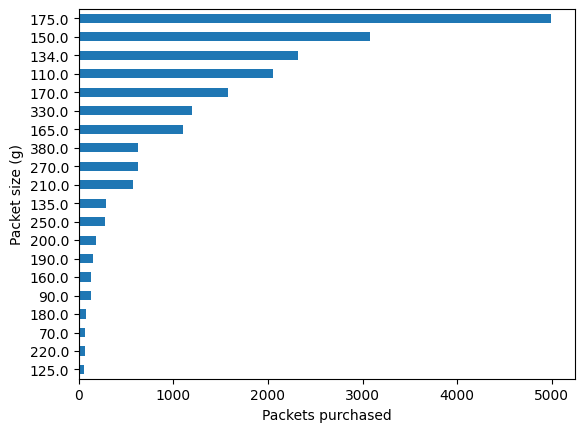

In [ ]:
# Plot the distribution of the packet sizes for a general indication of popularity
young_mainstream = full_df.loc[full_df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES"]
young_mainstream = young_mainstream.loc[young_mainstream['MEMBER_TYPE'] == "Mainstream"]
ax = young_mainstream["PACK_SIZE"].value_counts().sort_values(ascending = True).plot.barh()
ax.set_ylabel("Packet size (g)")
ax.set_xlabel("Packets purchased")
plt.show()

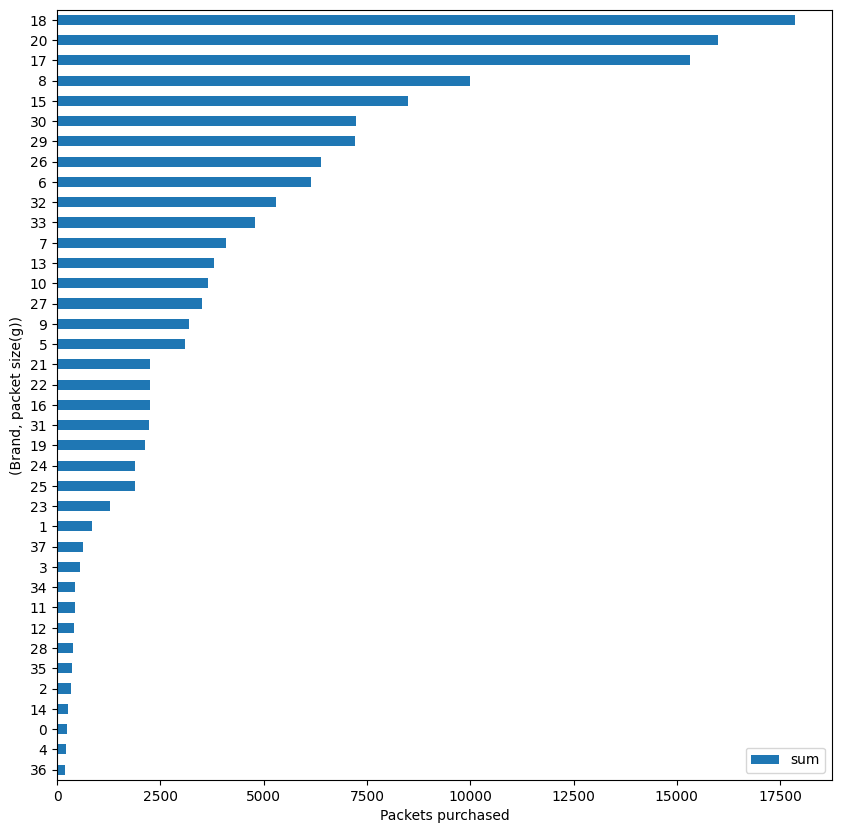

In [ ]:
# Check which brands correspond to what sized packets.
brand_size = young_mainstream.groupby(['BRAND_NAME','PACK_SIZE'], as_index = False)['TOT_SALES'].agg(['sum'])
ax = brand_size.sort_values(by = 'sum').plot.barh(y = "sum", figsize=(10,10))
ax.set_ylabel("(Brand, packet size(g))")
ax.set_xlabel("Packets purchased")
plt.show()

In [ ]:
groups = pd.get_dummies(temp["GROUP"])
brands = pd.get_dummies(temp["PACK_SIZE"])
groups_brands = groups.join(brands)
groups_brands

,MIDAGE SINGLES/COUPLES - Budget,MIDAGE SINGLES/COUPLES - Mainstream,MIDAGE SINGLES/COUPLES - Premium,NEW FAMILIES - Budget,NEW FAMILIES - Mainstream,NEW FAMILIES - Premium,OLDER FAMILIES - Budget,OLDER FAMILIES - Mainstream,OLDER FAMILIES - Premium,OLDER SINGLES/COUPLES - Budget,...,175.0,180.0,190.0,200.0,210.0,220.0,250.0,270.0,330.0,380.0
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
246736,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
246737,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
246738,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
freq_groupsbrands = apriori(groups_brands, min_support=0.009, use_colnames=True)
rules = association_rules(freq_groupsbrands, metric="lift", min_threshold=0.5, num_itemsets=freq_groups_brands['itemsets'].apply(len).max())
rules.sort_values('confidence', ascending = False, inplace = True)
set_temp = temp["GROUP"].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
39,(YOUNG FAMILIES - Premium),(175.0),0.043706,0.269069,0.012150,0.278004,1.033210,1.0,0.000391,1.012377,0.033612,0.040417,0.012225,0.161581
34,(YOUNG FAMILIES - Budget),(175.0),0.071991,0.269069,0.019944,0.277037,1.029613,1.0,0.000574,1.011021,0.030992,0.062109,0.010901,0.175580
40,(YOUNG SINGLES/COUPLES - Budget),(175.0),0.034745,0.269069,0.009476,0.272717,1.013558,1.0,0.000127,1.005016,0.013858,0.032193,0.004991,0.153966
6,(OLDER FAMILIES - Mainstream),(175.0),0.053664,0.269069,0.014542,0.270977,1.007091,1.0,0.000102,1.002617,0.007440,0.047184,0.002610,0.162510
8,(OLDER FAMILIES - Premium),(175.0),0.042162,0.269069,0.011413,0.270691,1.006030,1.0,0.000068,1.002225,0.006258,0.038066,0.002220,0.156554
24,(RETIREES - Budget),(175.0),0.057652,0.269069,0.015591,0.270439,1.005094,1.0,0.000079,1.001879,0.005379,0.050112,0.001875,0.164192
30,(RETIREES - Premium),(175.0),0.049591,0.269069,0.013399,0.270186,1.004154,1.0,0.000055,1.001531,0.004353,0.043893,0.001529,0.159991
5,(OLDER FAMILIES - Budget),(175.0),0.087193,0.269069,0.023539,0.269964,1.003327,1.0,0.000078,1.001226,0.003632,0.070746,0.001225,0.178723
12,(OLDER SINGLES/COUPLES - Budget),(175.0),0.069596,0.269069,0.018744,0.269334,1.000985,1.0,0.000018,1.000363,0.001058,0.058591,0.000363,0.169499
20,(OLDER SINGLES/COUPLES - Premium),(175.0),0.067115,0.269069,0.018068,0.269203,1.000499,1.0,0.000009,1.000184,0.000535,0.056796,0.000184,0.168176


Most segments purchase more chip packets that are 175g, which is also the size that most Kettles chips are purchased in.

Determine whether mainstream young singles/couples have certain preferences over the other segments again using the affinity index.

In [ ]:
# Target rating proportion
target_segment = young_mainstream["PACK_SIZE"].value_counts().sort_values(ascending = True).rename_axis('SIZES').reset_index(name='target')
target_segment.target /= young_mainstream["PROD_QTY"].sum()

# Other rating proportion
other = not_young_mainstream["PACK_SIZE"].value_counts().sort_values(ascending = True).rename_axis('SIZES').reset_index(name='other')
other.other /= not_young_mainstream["PROD_QTY"].sum()

brand_proportions = target_segment.set_index('SIZES').join(other.set_index('SIZES'))
brand_proportions = brand_proportions.reset_index()
brand_proportions['affinity'] = brand_proportions['target']/brand_proportions['other']
brand_proportions.sort_values(by = 'affinity', ascending = False)

,SIZES,target,other,affinity
11,270.0,0.017115,0.012958,1.320826
12,380.0,0.017281,0.013375,1.291992
14,330.0,0.032988,0.026455,1.246968
10,210.0,0.015901,0.012973,1.225655
17,134.0,0.063906,0.052477,1.217793
16,110.0,0.056618,0.046653,1.213618
9,135.0,0.008006,0.006750,1.185951
8,250.0,0.007729,0.006674,1.158076
15,170.0,0.043478,0.041826,1.039502
18,150.0,0.085024,0.084969,1.000652


Mainstream young singles/couples are 32% more likely to purcahse 270g chips than the other segments. However, they are 50% less likely to purchase 220g chips.

The chips that come in 270g bags are Twisties while Burger Rings come in 220g bags, which is consistent with the affinity testing for the brands.

# Summary of Analysis
The three highest contributing segments to total sales are:

* Older Families (Budget)
* Young Singles/Couples (Mainstream)
* Retirees (Mainstream)

The largest population group is mainstream young singles/couples, followed by mainstream retirees, which explains their significant contribution to total sales. For budget older families, population size is not the key factor; instead, older and young families generally purchase more chips per customer. Notably, mainstream young singles/couples exhibit the highest spend per purchase, which is statistically significant compared to their non-mainstream counterparts.

Further analysis of the mainstream young singles/couples segment reveals that they are 28% more likely to purchase Tyrells chips than other groups. While this segment buys the most Kettles chips, consistent with overall trends, they are 50% less likely to purchase Burger Rings. This aligns with their preference on these insights, Tyrells and Twisties chips could be strategically positioned in stores to capture the attention of mainstream young singles/couples. Placing these products near Kettles chips, which are the most popular overall, could increase their visibility and appeal to this primary target segment.

This approach could also be extended to other segments that favor Kettles chips. By aligning product placement with the preferences of these high-contributing groups, such as focusing on preferred packet sizes and complementary brands, total sales could potentially be further boosted.